In [ ]:

import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import os

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")


In [ ]:

X = pickle.load(open("../saved_models/X.pkl", "rb"))
y = pickle.load(open("../saved_models/y.pkl", "rb"))

print("Features shape:", X.shape)
print("Labels shape:", y.shape)


Features shape: (1090517, 14)
Labels shape: (1090518,)


In [ ]:

print("Before alignment:")
print("X shape:", X.shape)
print("y shape:", y.shape)

y = y.iloc[X.index].reset_index(drop=True)
X = X.reset_index(drop=True)

print("After alignment:")
print("X shape:", X.shape)
print("y shape:", y.shape)


Before alignment:
X shape: (1090517, 14)
y shape: (1090518,)
After alignment:
X shape: (1090517, 14)
y shape: (1090517,)


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (872413, 14) (872413,)
Testing set shape: (218104, 14) (218104,)


Random Forest Accuracy: 0.8111497267358692

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.97      0.88    154764
           1       0.85      0.43      0.57     63340

    accuracy                           0.81    218104
   macro avg       0.83      0.70      0.72    218104
weighted avg       0.82      0.81      0.79    218104



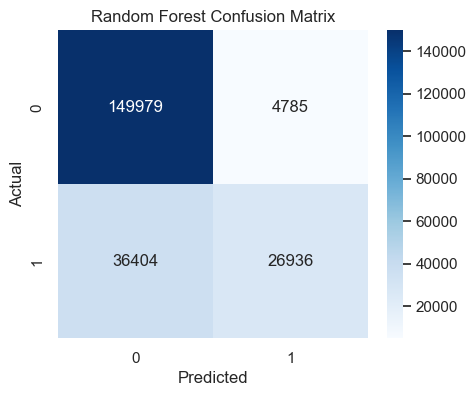

In [ ]:
rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=15,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

acc_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", acc_rf)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


c:\Users\aktiw\OneDrive\Desktop\Milicious Url Prediction Model\.venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [00:08:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.8242123023878517

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.96      0.89    154764
           1       0.84      0.49      0.62     63340

    accuracy                           0.82    218104
   macro avg       0.83      0.73      0.75    218104
weighted avg       0.83      0.82      0.81    218104



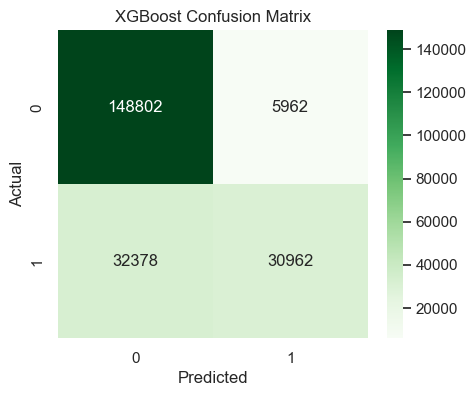

In [ ]:

xgb_model = XGBClassifier(
    n_estimators=200,
    max_depth=10,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric="logloss",
    random_state=42
)

xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate
acc_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy:", acc_xgb)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt="d", cmap="Greens")
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


c:\Users\aktiw\OneDrive\Desktop\Milicious Url Prediction Model\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1184: FutureWarning: 'n_jobs' has no effect since 1.8 and will be removed in 1.10. You provided 'n_jobs=-1', please leave it unspecified.
  warnings.warn(msg, category=FutureWarning)


Logistic Regression Accuracy: 0.7275611634816418

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.99      0.84    154764
           1       0.75      0.09      0.16     63340

    accuracy                           0.73    218104
   macro avg       0.74      0.54      0.50    218104
weighted avg       0.73      0.73      0.64    218104



c:\Users\aktiw\OneDrive\Desktop\Milicious Url Prediction Model\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 500 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=500).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


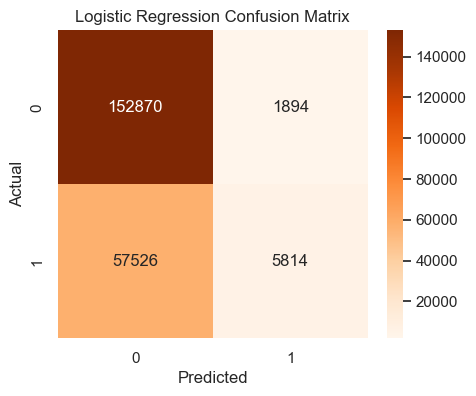

In [ ]:

lr_model = LogisticRegression(
    max_iter=500,
    n_jobs=-1,
    random_state=42
)

lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Evaluate
acc_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", acc_lr)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt="d", cmap="Oranges")
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:

os.makedirs("../saved_models/final_models", exist_ok=True)

pickle.dump(rf_model, open("../saved_models/final_models/rf_model.pkl", "wb"))
pickle.dump(xgb_model, open("../saved_models/final_models/xgb_model.pkl", "wb"))
pickle.dump(lr_model, open("../saved_models/final_models/lr_model.pkl", "wb"))

print("Models saved in ../saved_models/final_models/")


Models saved in ../saved_models/final_models/
